In [2]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from src.data_exploration.data_exploration import *

<Axes: >

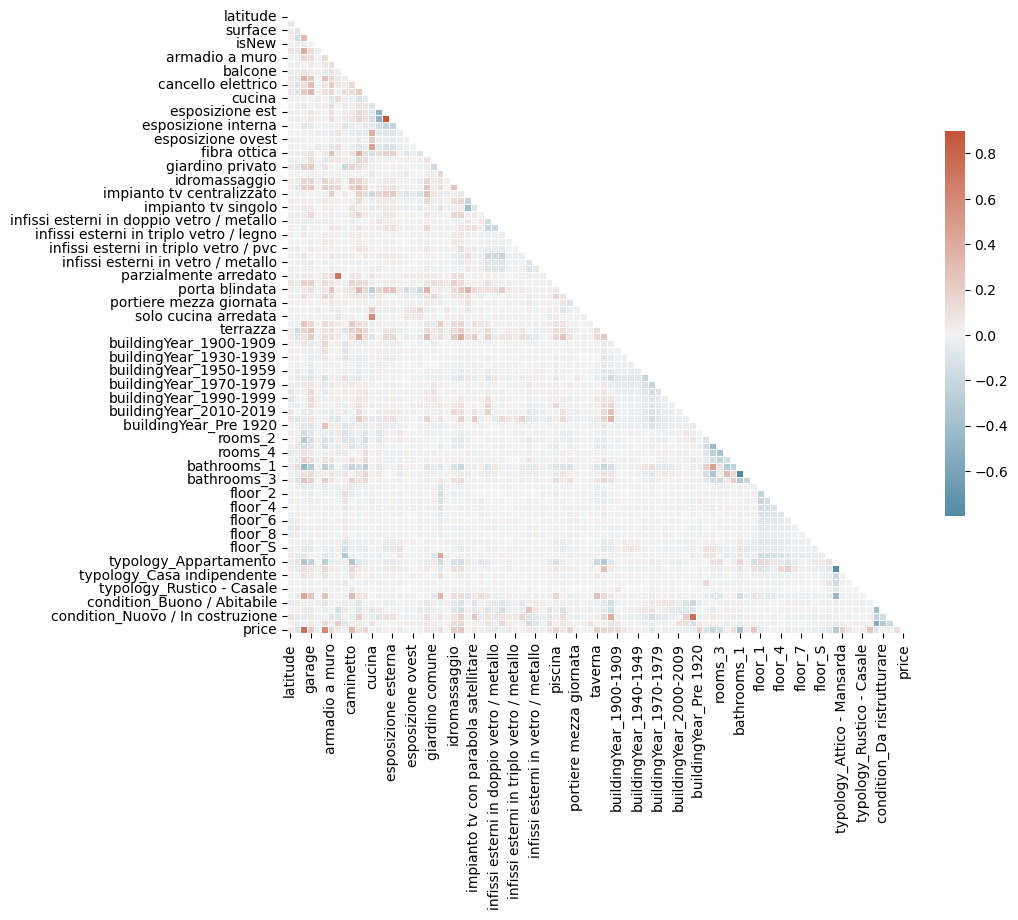

In [3]:
train = read_sqlite_table('train', './data/train_test/train_data_lgb.db')
test = read_sqlite_table('test', './data/train_test/test_data_lgb.db')

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
train[train.columns[:]].corr()['price'][:].sort_values(ascending=False)

price                                        1.000000
surface                                      0.735276
luxury                                       0.610052
caminetto                                    0.354090
typology_Villa                               0.260654
impianto di allarme                          0.252685
bathrooms_3                                  0.248066
garage                                       0.228437
idromassaggio                                0.222105
buildingYear_Pre 1920                        0.218058
typology_Attico - Mansarda                   0.185877
taverna                                      0.184007
piscina                                      0.183160
cantina                                      0.175772
portiere intera giornata                     0.172856
terrazza                                     0.159478
armadio a muro                               0.147599
videocitofono                                0.131525
rooms_5                     

In [5]:
train_target = train['price'].to_numpy()
train_data = train.drop('price', axis=1).to_numpy()
test_target = test['price'].to_numpy()
test_data = test.drop('price', axis=1).to_numpy()

In [6]:
train_target.shape, train_data.shape, test_target.shape, test_data.shape

((13540,), (13540, 90), (1504,), (1504, 90))

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [9]:
np.save( './data/train_test/train_data_lgb.npy', train_data)
np.save( './data/train_test/test_data_lgb.npy', test_data)
np.save( './data/train_test/train_target_lgb.npy', train_target)
np.save( './data/train_test/test_target_lgb.npy', test_target)

In [10]:
scaler

MinMaxScaler()

In [11]:
import joblib

In [12]:
joblib.dump(scaler, './model/minmaxscaler.save') 

['./model/minmaxscaler.save']